## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [46]:
#import pandas and read_csv
import pandas as pd
#import matplotlib for data visualization later
import matplotlib.pyplot as plt

## Data Exploration

In [6]:
#Read the .csv file and store it in a Pandas dataframe
df = pd.read_csv("QueryResults.csv")

In [7]:
#Examine the first 5 rows and the last 5 rows of the of the dataframe
df.head()

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,82
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164


In [8]:
# cleaning the column names to rename the fields
df = df.rename({'m':'Date','Unnamed: 2':'Posts'}, axis=1)

In [9]:
df.tail()

,Date,TagName,Posts
2672,2024-08-01 00:00:00,php,924
2673,2024-08-01 00:00:00,python,5081
2674,2024-08-01 00:00:00,r,928
2675,2024-08-01 00:00:00,ruby,110
2676,2024-08-01 00:00:00,swift,623


Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [10]:
#2677 rows, 3 columns
df.shape

(2677, 3)

Count the number of entries in each column of the dataframe

In [11]:
# all columns have the same amount of entries, meaning no NULL values
df.count()

,0
Date,2677
TagName,2677
Posts,2677


Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [12]:
#total posts by language, only dispaly the TagName and Posts fields
df.groupby('TagName')['Posts'].sum()

,Posts
TagName,
assembly,44712
c,405877
c#,1620774
c++,810375
delphi,52139
go,73688
java,1918780
javascript,2532069
perl,68206


In [13]:
highest_total_posts= total_post_by_language.idxmax()
print(f"The highest number of posts is attributed to {highest_total_posts}.")

NameError: name 'total_post_by_language' is not defined

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [14]:
#Total months of posts by language
grouped_by_tag = df.groupby('TagName')['Date'].count()
grouped_by_tag

,Date
TagName,
assembly,193
c,193
c#,194
c++,193
delphi,193
go,178
java,193
javascript,193
perl,193


In [15]:
tag_with_min_posts = grouped_by_tag.idxmin()
min_posts_tag = grouped_by_tag.min()
print(f"Tag with the smallest total posts: {tag_with_min_posts} ({min_posts_tag} posts)")


Tag with the smallest total posts: go (178 posts)


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [16]:
df['Date'][1]

'2008-08-01 00:00:00'

In [17]:
#check the type of the current 'Date' field
type(df['Date'][1])

str

In [18]:
#convert to datetime using pandas and confirm conversion
print(pd.to_datetime(df['Date'][1]))
type(pd.to_datetime(df['Date'][1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [19]:
#apply conversion to all rows in the field by setting that row equal to the conversion formula
df.Date = pd.to_datetime(df.Date)
df.head()

,Date,TagName,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


## Data Manipulation



In [32]:
#Sometimes you want to convert your DataFrame so that each category has its own column.
#when pivoting, there are three arguments to pass: index(representing the categories for the rows), columns(representing the categories for the columns), values(what you want in the cells)
reshaped_df = df.pivot(index='Date', columns='TagName', values='Posts')

What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [33]:
reshaped_df.shape
# 194 rows, 14 columns in the reshaped dataframe

(194, 14)

In [24]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TagName')

In [26]:
reshaped_df.head()

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,221.0,161.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1640.0,753.0,104.0,NaN,1125.0,633.0,130.0,474.0,535.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1985.0,805.0,112.0,NaN,1146.0,721.0,128.0,604.0,505.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,139.0,NaN,954.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [28]:
# the count of entries is different, because there are values represented as NaN (not a number), which are not included in the count
reshaped_df.count()

,0
TagName,
assembly,193
c,193
c#,194
c++,193
delphi,193
go,178
java,193
javascript,193
perl,193


In [40]:
# substitute the number 0 for any NaN value to reflect accurate counts for each programming language; the 'inplace' argument means that we are updating reshaped_df
reshaped_df.fillna(0, inplace=True)

In [35]:
reshaped_df.head()

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,82.0,503.0,164.0,13.0,0.0,221.0,161.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,320.0,1640.0,753.0,104.0,0.0,1125.0,633.0,130.0,474.0,535.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1985.0,805.0,112.0,0.0,1146.0,721.0,128.0,604.0,505.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,734.0,139.0,0.0,954.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0


In [39]:
#confirming whether there are any remaining NaN values; there are not
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


[matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

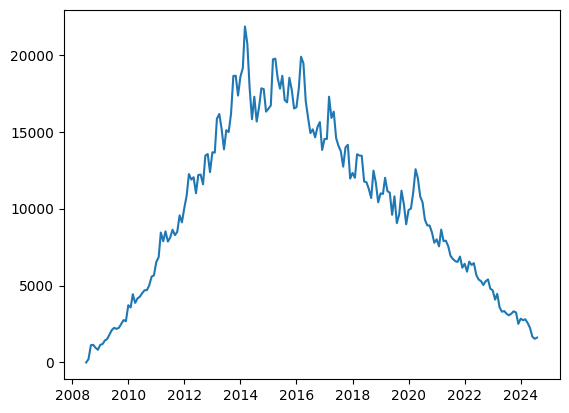

In [47]:
# plot('x-label', 'y-label', data=object); when we include the dfname in the naming of the x and y labels, we don't need to pass the data argument as well
plt.plot(reshaped_df.index,reshaped_df['java'])

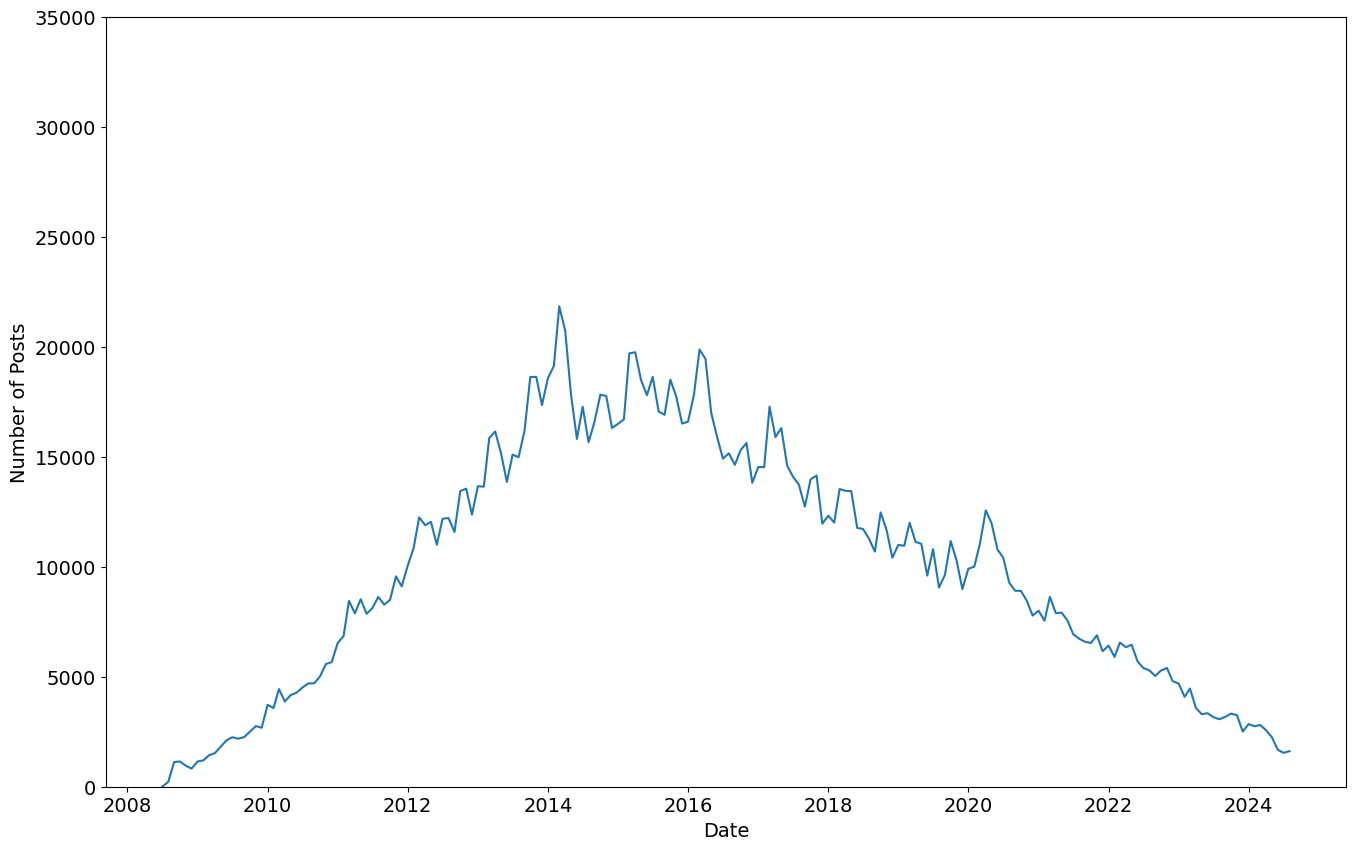

In [53]:
#resizing the chart output with figsize
plt.figure(figsize=(16,10))
#resizing the tick sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index,reshaped_df['java'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

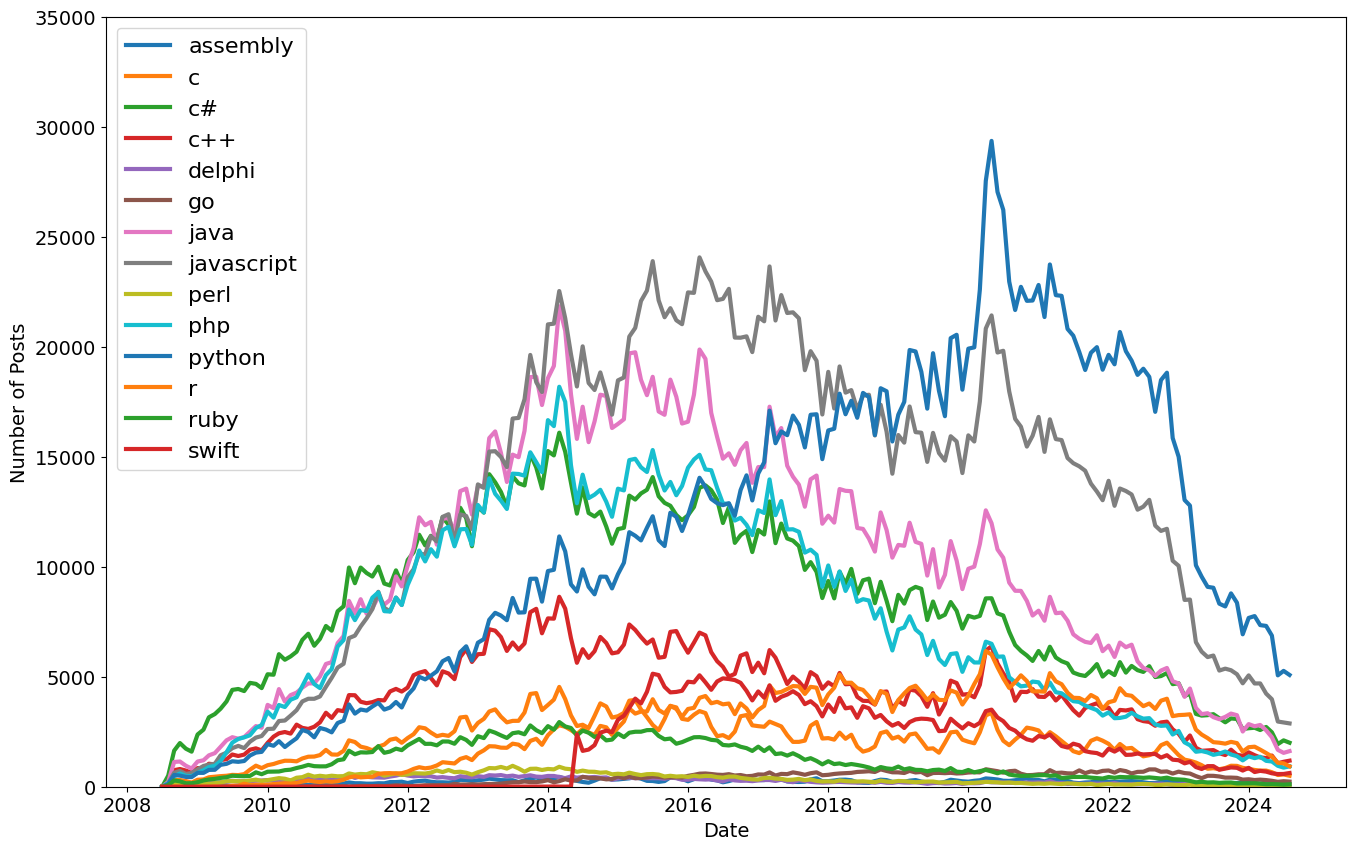

In [63]:
#resizing the chart output with figsize
plt.figure(figsize=(16,10))
#resizing the tick sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

#this approach is simple for smaller sets, but with larger datasets makes it complicated to see which is which;
# plt.plot(reshaped_df.index,reshaped_df['java'])
# plt.plot(reshaped_df.index,reshaped_df['python'])
# plt.plot(reshaped_df.index,reshaped_df['assembly'])
# plt.plot(reshaped_df.index,reshaped_df['c'])
# plt.plot(reshaped_df.index,reshaped_df['c#'])
# plt.plot(reshaped_df.index,reshaped_df['c++'])
# plt.plot(reshaped_df.index,reshaped_df['delphi'])
# plt.plot(reshaped_df.index,reshaped_df['go'])
# plt.plot(reshaped_df.index,reshaped_df['javascript'])
# plt.plot(reshaped_df.index,reshaped_df['perl'])
# plt.plot(reshaped_df.index,reshaped_df['php'])
# plt.plot(reshaped_df.index,reshaped_df['r'])
# plt.plot(reshaped_df.index,reshaped_df['ruby'])
# plt.plot(reshaped_df.index,reshaped_df['swift'])

#a better approach to plotting:
for column in reshaped_df.columns:
  #plot the x-axis with index:date, plot the y axis with the column: programming name
  plt.plot(reshaped_df.index, reshaped_df[column],
           linewidth=3, label=reshaped_df[column].name)
  plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

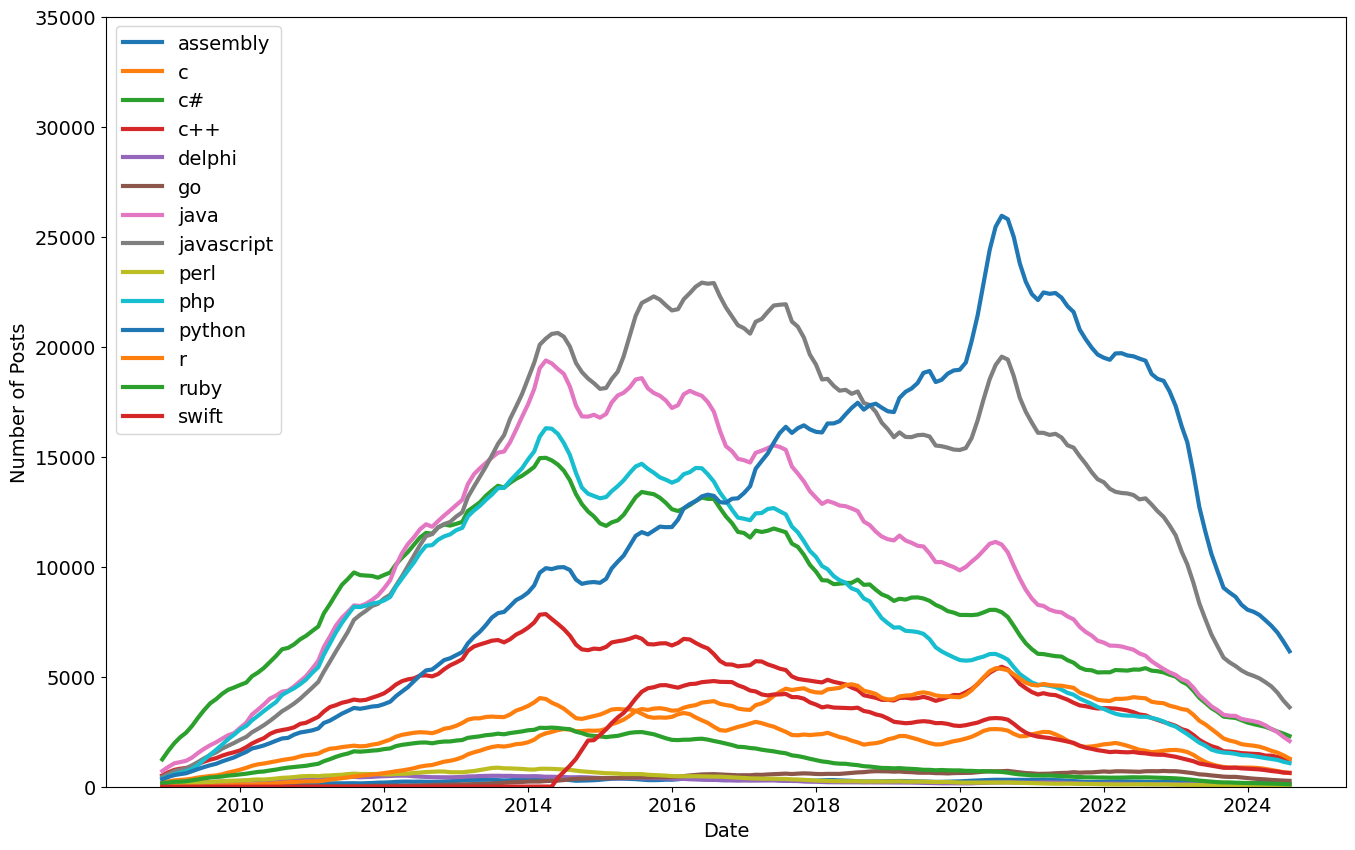

In [70]:
#DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=_NoDefault.no_default, closed=None, step=None, method='single')
#the window is the number of observations that are averaged; i.e. average 6 observations and then roll the window forward and repeat
roll_df = reshaped_df.rolling(window=6).mean()

#change window size
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
#set the boundaries of the chart
plt.ylim(0, 35000)

#plot the roll_df
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column],
           linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=14)